In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
humedad = ctrl.Antecedent(np.arange(0, 4096,1), 'humedad')
tiempo_riego = ctrl.Consequent(np.arange(0, 16, 1), 'tiempo_riego')

# Auto-membership function population is possible with .automf(3, 5, or 7)
humedad.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tiempo_riego['low'] = fuzz.trimf(tiempo_riego.universe, [0, 1, 2])
tiempo_riego['medium'] = fuzz.trimf(tiempo_riego.universe, [1, 4, 8])
tiempo_riego['high'] = fuzz.trimf(tiempo_riego.universe, [4, 9, 15])

/home/jorge/django/smartnature_env/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


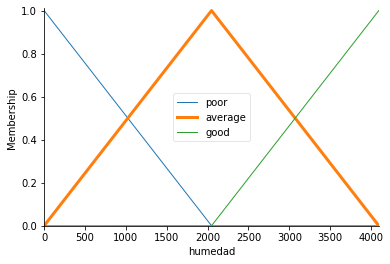

In [47]:
humedad['average'].view()

/home/jorge/django/smartnature_env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


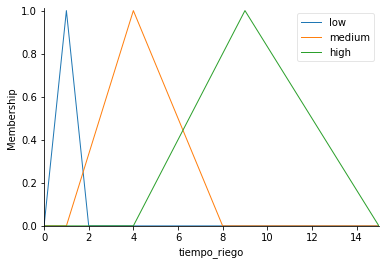

In [48]:
tiempo_riego.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

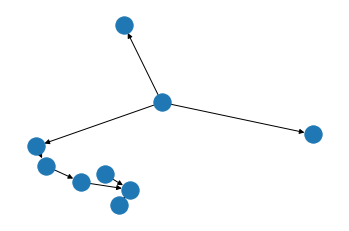

In [49]:
rule1 = ctrl.Rule(humedad['poor'], tiempo_riego['low'])
rule2 = ctrl.Rule(humedad['average'], tiempo_riego['medium'])
rule3 = ctrl.Rule(humedad['good'], tiempo_riego['high'])

rule1.view()

In [50]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [51]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [54]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['humedad'] = 4096

# Crunch the numbers
tipping.compute()

9.333333333333332


/home/jorge/django/smartnature_env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


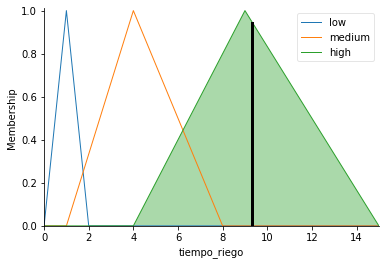

In [55]:
print (tipping.output['tiempo_riego'])
tiempo_riego.view(sim=tipping)